<a href="https://colab.research.google.com/github/phuongnt3391/ReinforcementLearning/blob/main/UpperConfidenceBound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import the dataset

In [2]:
df = pd.read_csv('Ads_CTR_Optimisation.csv')
df.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


Feature Engineering the data

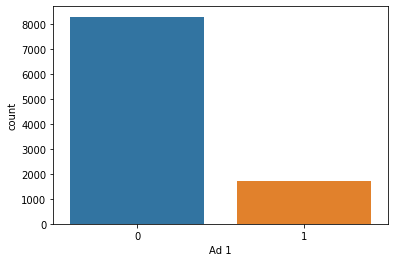

In [4]:
sns.countplot(data=df, x='Ad 1')

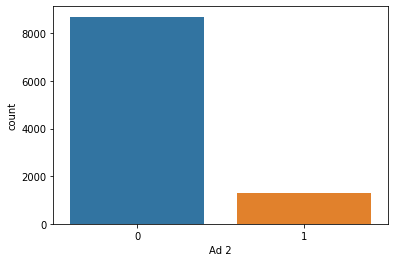

In [5]:
sns.countplot(data=df, x='Ad 2')

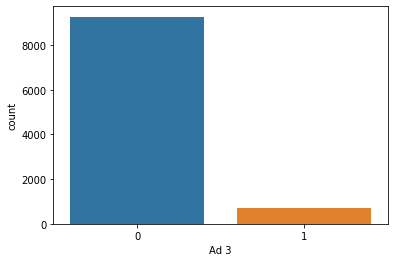

In [6]:
sns.countplot(data=df, x='Ad 3')

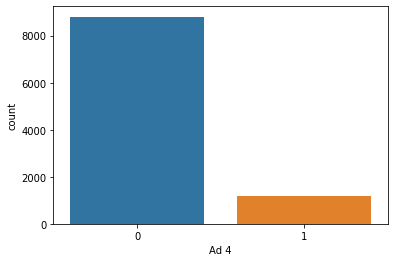

In [7]:
sns.countplot(data=df, x='Ad 4')

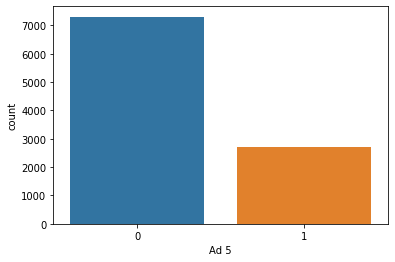

In [8]:
sns.countplot(data=df, x='Ad 5')

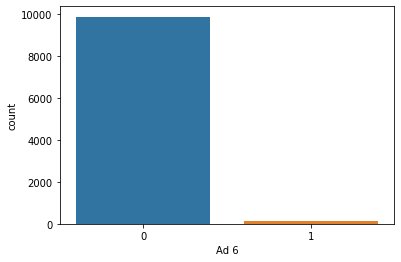

In [9]:
sns.countplot(data=df, x='Ad 6')

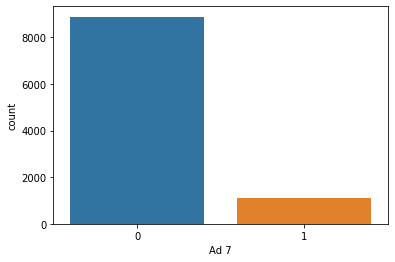

In [10]:
sns.countplot(data=df, x='Ad 7')

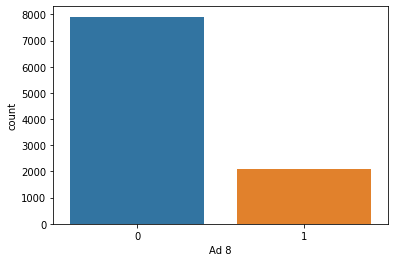

In [11]:
sns.countplot(data=df, x='Ad 8')

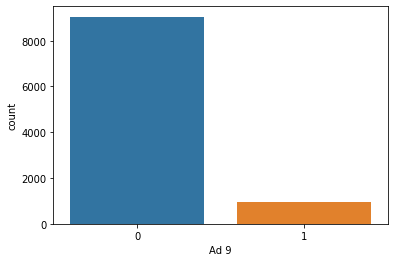

In [12]:
sns.countplot(data=df, x='Ad 9')

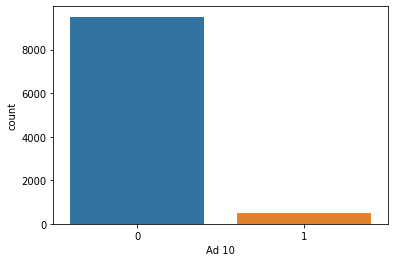

In [13]:
sns.countplot(data=df, x='Ad 10')

Implementing Upper Confidence Bound

In [15]:
N = 10000
d = 10
ads_selected = []
numbers_of_selection = [0]*d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0,N):
  ad = 0
  max_upper_bound = 0
  for i in range(0,d):
    if numbers_of_selection[i] >0:
      average_reward = sums_of_rewards[i]/numbers_of_selection[i]
      delta_i = np.sqrt((3/2 * np.log(n+1)/numbers_of_selection[i]))
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400
    if (upper_bound > max_upper_bound):
      max_upper_bound = upper_bound
      ad = i   
  ads_selected.append(ad)
  numbers_of_selection[ad] += 1  
  reward =  df.values[n,ad]
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward
  total_reward = total_reward + reward

Visualizing the results

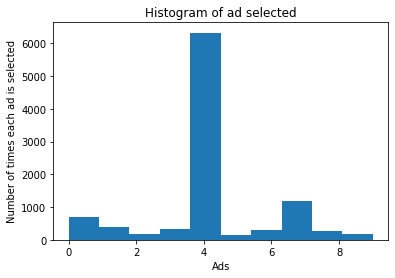

In [16]:
plt.hist(ads_selected)
plt.title('Histogram of ad selected')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad is selected')
plt.show()

Ad 4 is the most favourite ad to be clicked by customers